### Import  required libraries

In [23]:
import csv
from faker import Faker
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
pd.options.mode.chained_assignment = None
RECORD_COUNT = 150000
fake = Faker()

### Generate dataset with Faker and np.random
#### 10 features and 1 target

In [25]:
allRooms=[]
allBedrooms=[]
allBathrooms=[]
city=[]
typeHouse=[]
landSize=[]
houseSize=[]
floors=[]
garage=[]
yearBuilt=[]
distanceToCenter=[]

house_type_list = ['House', 'Cottage', 'Manor']
weights = [0.3, 0.4, 0.3]

for n in range(RECORD_COUNT):
    allRooms.append(fake.random_int(min=6, max=10)),
    allBedrooms.append(np.random.choice([1,2,3,4], p=[0.25, 0.25, 0.25, 0.25])),
    allBathrooms.append(np.random.choice([1,2,3], p=[0.3, 0.3, 0.4])),
    city.append(fake.city()),
    typeHouse.append(np.random.choice(house_type_list, p=weights)),
    landSize.append(fake.pyfloat(right_digits=3, positive=True, min_value=220, max_value=500)),
    houseSize.append(fake.pyfloat(right_digits=3, positive=True, min_value=150, max_value=300)),
    floors.append(np.random.choice([1,2,3], p=[0.3, 0.3, 0.4])),
    garage.append(np.random.choice([0,1], p=[0.4, 0.6])),
    yearBuilt.append(fake.random_int(min=1990, max=2020)),
    distanceToCenter.append(fake.pyfloat(right_digits=3, positive=True, min_value=30, max_value=80)),

variables=[allRooms, allBedrooms, allBathrooms, city, typeHouse, landSize, houseSize, floors, garage, yearBuilt, distanceToCenter]
df=pd.DataFrame(variables).transpose()

df.columns=['allRooms', 'allBedrooms', 'allBathrooms', 'city', 'typeHouse', 'landSize', 'houseSize', 
            'floors', 'garage', 'yearBuilt', 'distanceToCenter']

In [26]:
df.head()

,allRooms,allBedrooms,allBathrooms,city,typeHouse,landSize,houseSize,floors,garage,yearBuilt,distanceToCenter
0,10,1,3,West Jeffrey,Manor,464.603,247.106,3,1,2014,57.426
1,7,4,2,Munozport,Cottage,486.185,271.666,2,0,2002,35.421
2,8,3,3,Princeside,House,450.625,293.577,3,1,2009,78.864
3,8,4,1,Perryfurt,House,365.932,197.316,2,1,2006,46.42
4,6,3,3,East Marc,House,494.787,298.95,2,1,1999,64.204


### Build relationships between features and target

In [27]:
for i in range(RECORD_COUNT):
    prices=10000
    if df.iloc[i]['allRooms'] >= 8:
        prices += 5000
    if df.iloc[i]['allBedrooms'] >= 3:
        prices += 3000
    if df.iloc[i]['allBathrooms'] >= 2:
        prices += 3000
    if df.iloc[i]['typeHouse'] == 'Cottage':
        prices += 7000
    if df.iloc[i]['landSize'] > 300.0:
        prices += 10000
    if df.iloc[i]['houseSize'] > 200.0:
        prices += 8000
    if df.iloc[i]['floors'] == 3:
        prices += 5000
    if df.iloc[i]['garage'] == 1:
        prices += 4000
    if df.iloc[i]['distanceToCenter'] < 50.0:
        prices += 4000
    df.at[i,'sellPrice']=prices

In [28]:
df.head()

,allRooms,allBedrooms,allBathrooms,city,typeHouse,landSize,houseSize,floors,garage,yearBuilt,distanceToCenter,sellPrice
0,10,1,3,West Jeffrey,Manor,464.603,247.106,3,1,2014,57.426,45000.0
1,7,4,2,Munozport,Cottage,486.185,271.666,2,0,2002,35.421,45000.0
2,8,3,3,Princeside,House,450.625,293.577,3,1,2009,78.864,48000.0
3,8,4,1,Perryfurt,House,365.932,197.316,2,1,2006,46.42,36000.0
4,6,3,3,East Marc,House,494.787,298.95,2,1,1999,64.204,38000.0


### Write the dataset to a csv file

In [29]:
df.to_csv("dataset.csv", encoding='utf-8', index=False)
dataframe = pd.read_csv("dataset.csv")
dataframe.head()

,allRooms,allBedrooms,allBathrooms,city,typeHouse,landSize,houseSize,floors,garage,yearBuilt,distanceToCenter,sellPrice
0,10,1,3,West Jeffrey,Manor,464.603,247.106,3,1,2014,57.426,45000.0
1,7,4,2,Munozport,Cottage,486.185,271.666,2,0,2002,35.421,45000.0
2,8,3,3,Princeside,House,450.625,293.577,3,1,2009,78.864,48000.0
3,8,4,1,Perryfurt,House,365.932,197.316,2,1,2006,46.420,36000.0
4,6,3,3,East Marc,House,494.787,298.950,2,1,1999,64.204,38000.0


### Correlation between features

<AxesSubplot:>

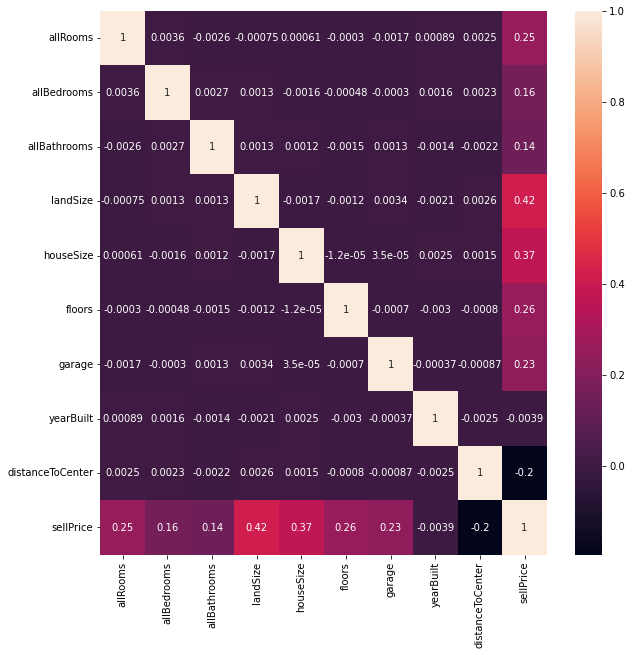

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
correlation_matrix = dataframe.corr()
sns.heatmap(data=correlation_matrix, annot=True)

In [31]:
for i in ['typeHouse']:
    df_cat = pd.get_dummies(dataframe[i])
    dataframe = pd.concat([dataframe, df_cat], axis=1)
    dataframe.drop(i, axis=1, inplace=True)
dataframe = dataframe.drop(['city', 'yearBuilt'], axis = 1)
dataframe.head()

,allRooms,allBedrooms,allBathrooms,landSize,houseSize,floors,garage,distanceToCenter,sellPrice,Cottage,House,Manor
0,10,1,3,464.603,247.106,3,1,57.426,45000.0,0,0,1
1,7,4,2,486.185,271.666,2,0,35.421,45000.0,1,0,0
2,8,3,3,450.625,293.577,3,1,78.864,48000.0,0,1,0
3,8,4,1,365.932,197.316,2,1,46.420,36000.0,0,1,0
4,6,3,3,494.787,298.950,2,1,64.204,38000.0,0,1,0


### Normalize the data

In [32]:
from sklearn import preprocessing
      
x = dataframe.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = ['allRooms', 'allBedrooms', 'allBathrooms', 'landSize', 'houseSize', 'floors', 'garage', 'distanceToCenter', 'sellPrice', 'Cottage', 'House', 'Manor']
df.head()

,allRooms,allBedrooms,allBathrooms,landSize,houseSize,floors,garage,distanceToCenter,sellPrice,Cottage,House,Manor
0,1.00,0.000000,1.0,0.873585,0.647147,1.0,1.0,0.548542,0.714286,0.0,0.0,1.0
1,0.25,1.000000,0.5,0.950664,0.810991,0.5,0.0,0.108424,0.714286,1.0,0.0,0.0
2,0.50,0.666667,1.0,0.823664,0.957164,1.0,1.0,0.977319,0.775510,0.0,1.0,0.0
3,0.50,1.000000,0.0,0.521188,0.314988,0.5,1.0,0.328413,0.530612,0.0,1.0,0.0
4,0.00,0.666667,1.0,0.981386,0.993009,0.5,1.0,0.684107,0.571429,0.0,1.0,0.0


### Build a Linear Regression model

In [33]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = df[['allRooms', 'allBedrooms', 'allBathrooms', 'landSize', 'houseSize', 'floors', 'garage', 'distanceToCenter', 'Cottage', 'House', 'Manor']]
y = df['sellPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('MSE ---> ', metrics.mean_squared_error(y_test, y_pred))

MSE --->  0.007208922461305379


### Design 3 Dense Neural Networks (DNN):
- (DNN1) with 1 hidden layer
- (DNN2) with 5 hidden layers
- (DNN3) with 25 hidden layers

### Prepare 3 optimizers:
- (OPT1) SGD
- (OPT2) RMSProp
- (OPT3) Adam

### Explore the following learning rates:
- (lr1) 0.1
- (lr2) 0.01
- (lr3) 0.001


### Import required libraries for DNN

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.metrics import MeanSquaredError as MSE
from tensorflow.keras.losses import MeanSquaredError

import matplotlib.pyplot as plt

### Set learning rate, optimizer and hidden layers options

In [35]:
learning_rates = [0.1, 0.01, 0.001]
optimizers = [SGD, RMSprop, Adam]
layers = [1, 5, 25]

accuracies = pd.DataFrame()
val_accuracies = pd.DataFrame()
losses = pd.DataFrame()
val_losses = pd.DataFrame()
models = []

### Build a DNN model

In [36]:
def DNN_model(hidden_layers, optimizer, features):
    model = Sequential()
    model.add(Dense(12, activation='relu', input_shape=(32, 11)))
    for i in range(hidden_layers):
        model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1, activation = 'relu'))
    model.compile(optimizer=optimizer, loss='mse', metrics=MSE())
    return model

### Fit target with all combinations of DNNs, optimizers, and learning rates

In [37]:
for num_layers in layers:
    for learning_rate in learning_rates:
        for optimizer in optimizers:
            opt = '-'.join(str(optimizer).split("'")[1].split(".")[-2:])
            model = DNN_model(num_layers, optimizer(learning_rate=learning_rate), 11)
            history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size=32, verbose=1, validation_split=0.1).history
            accuracies[f'{num_layers}-{learning_rate}-{opt}'] = history['mean_squared_error'] 
            val_accuracies[f'{num_layers}-{learning_rate}-{opt}'] = history['val_mean_squared_error'] 
            losses[f'{num_layers}-{learning_rate}-{opt}'] = history['loss'] 
            val_losses[f'{num_layers}-{learning_rate}-{opt}'] = history['val_loss'] 
            models.append(model)

Epoch 1/10
3375/3375 [==============================] - 5s 2ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 2/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 3/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 4/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 5/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 6/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 7/10
3375/

3375/3375 [==============================] - 4s 1ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 4/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 5/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 6/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 7/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 8/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 9/10
3375/3375 [=====

Epoch 10/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 1/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 3/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 4/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 5/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 6/10
3375

3375/3375 [==============================] - 5s 1ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 3/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 4/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 5/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 6/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 7/10
3375/3375 [==============================] - 5s 2ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 8/10
3375/3375 [=====

Epoch 9/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 9.7179e-04 - val_mean_squared_error: 9.7179e-04
Epoch 10/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 1/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 2/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 3/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 4/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 5

Epoch 2/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 3/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 4/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 5/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 6/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 7/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 8/10
3375/

Epoch 9/10
3375/3375 [==============================] - 9s 3ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 10/10
3375/3375 [==============================] - 9s 3ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 1/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 2/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 3/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 4/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 5/10
3375

Epoch 2/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 3/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 4/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 5/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 6/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 7/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3534 - val_mean_squared_error: 0.3534
Epoch 8/10
3375/

### Plot learning curves for all combinations

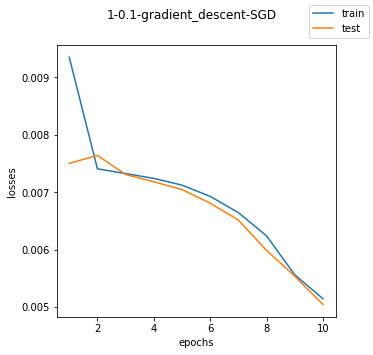

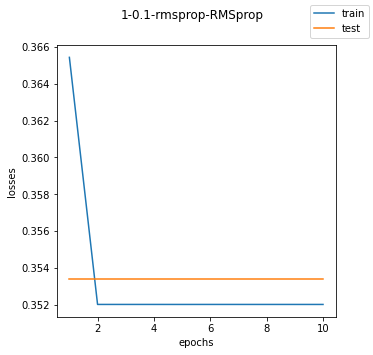

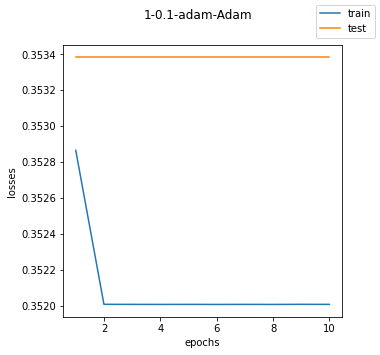

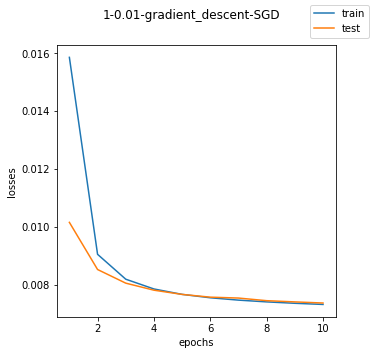

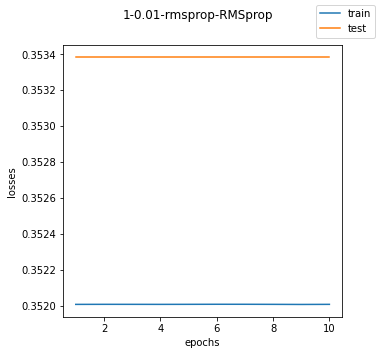

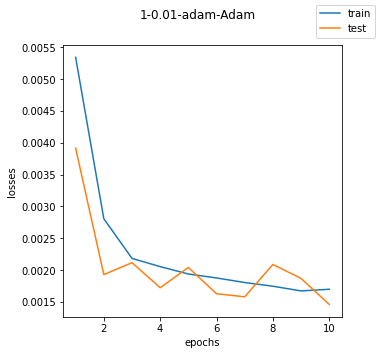

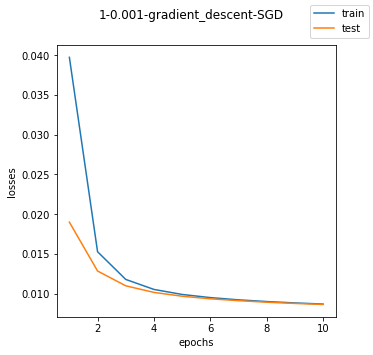

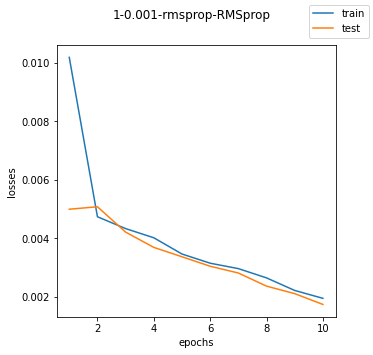

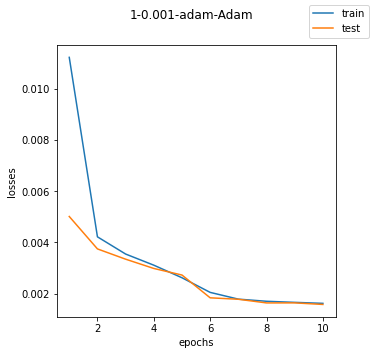

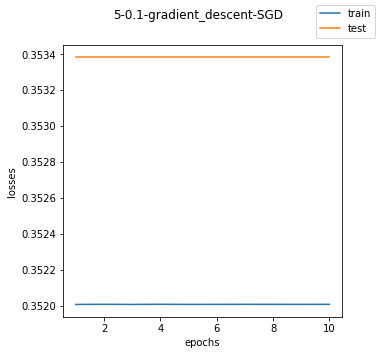

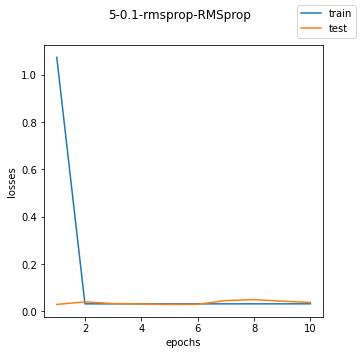

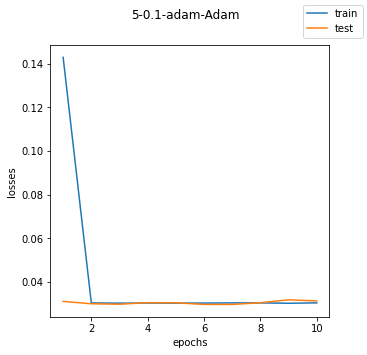

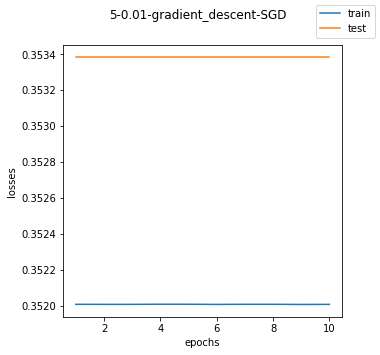

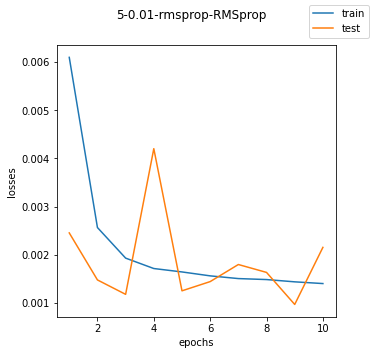

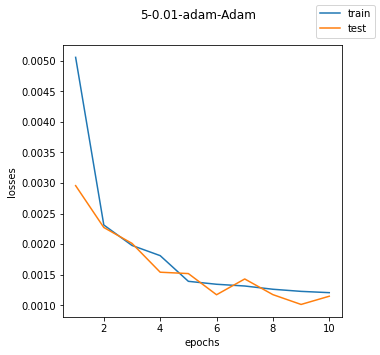

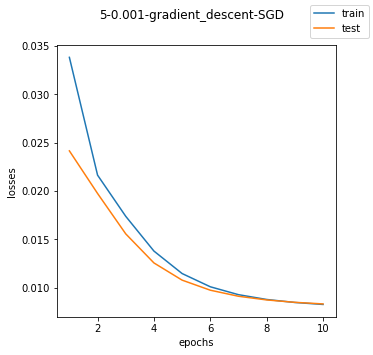

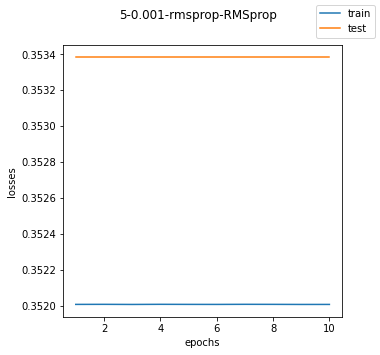

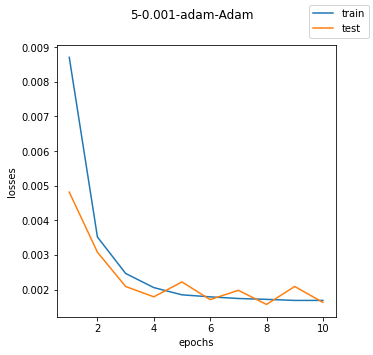

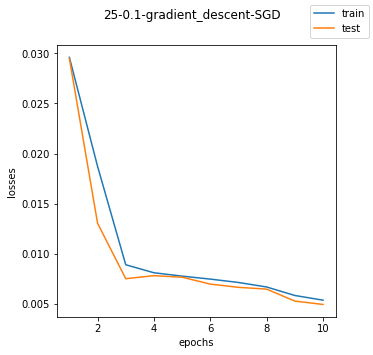

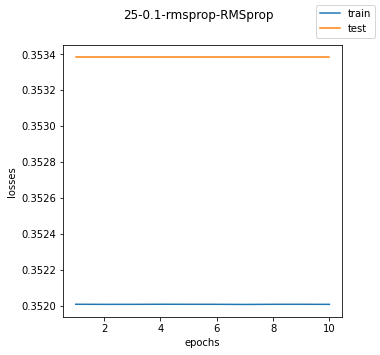

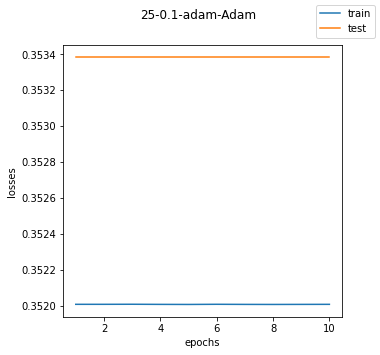

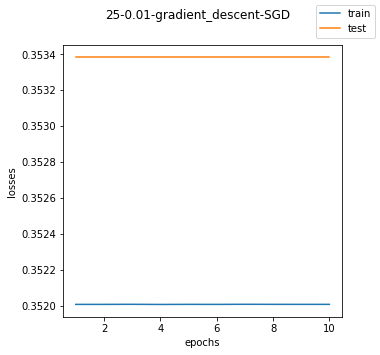

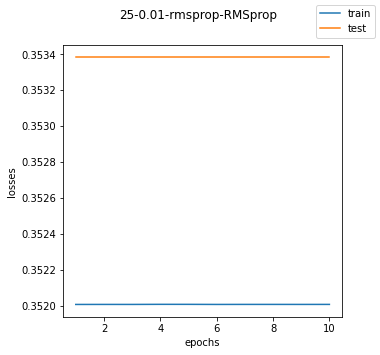

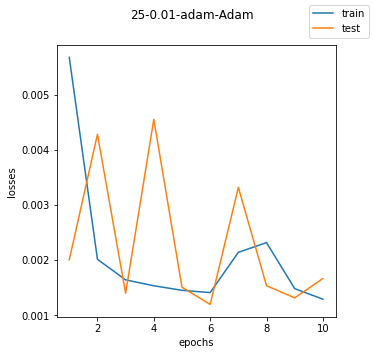

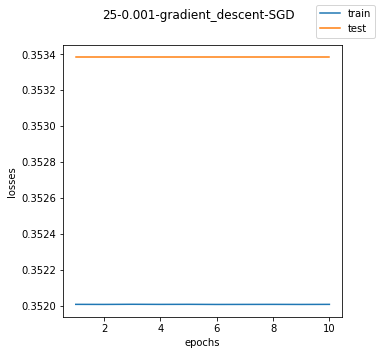

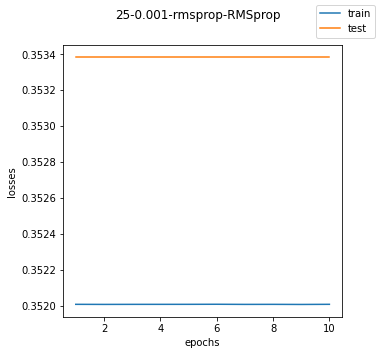

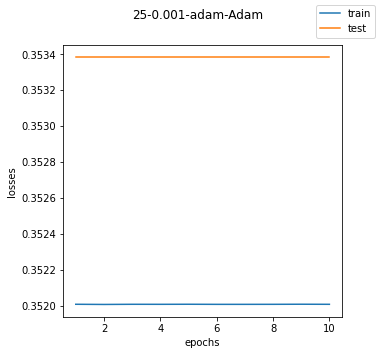

In [38]:
import os

for i in accuracies.columns:
    x_plot = np.linspace(1, 10, 10)
    fig, axes = plt.subplots(figsize=(5,5))
    axes.plot(x_plot, losses[i], label='loss')
    axes.plot(x_plot, val_losses[i], label='val_loss')
    axes.set_xlabel('epochs')
    axes.set_ylabel('losses')
    fig.suptitle(i)
    fig.legend(['train', 'test'], loc='upper right')
    plt.show()

### Show all results

In [41]:
results = []
for i in range(27):
    results.append([accuracies.columns[i], models[i].evaluate(X_test, y_test, verbose=0)[0]])
results_df = pd.DataFrame(results)
results_df.columns = ['Combination', 'MSE']
results_df_f = results_df['Combination'].str.split("-", expand=True)
results_df = pd.concat([results_df, results_df_f], axis=1)
results_df.columns = ['Combination', 'MSE', 'layers', 'learning rate', 'optimizer1', 'optimizer2']
fin = results_df.drop(['Combination'], axis = 1)
fin.sort_values(by=['MSE'], inplace=True)
fin

,MSE,layers,learning rate,optimizer1,optimizer2
14,0.001146,5,0.01,adam,Adam
5,0.001413,1,0.01,adam,Adam
8,0.001553,1,0.001,adam,Adam
17,0.001579,5,0.001,adam,Adam
23,0.001607,25,0.01,adam,Adam
7,0.001713,1,0.001,rmsprop,RMSprop
13,0.002155,5,0.01,rmsprop,RMSprop
18,0.004775,25,0.1,gradient_descent,SGD
0,0.004855,1,0.1,gradient_descent,SGD
3,0.007271,1,0.01,gradient_descent,SGD


### Conclusion

Посортувавши значення MSE, бачимо, що найкраще себе показала комбінація learning rate - 0.01, optimizer - Adam, layers - 5.
Значення помилки при такій комбінації є меншим, ніж при лінійній регресії. Видно, що оптимізатор Адам у комбінації із різними значеннями learning rate та при різних значеннях прихованих шарів найкраще працює при такій моделі і з цими даними.